# Регрессия IC50

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
target = 'CC50, mM'

In [53]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [54]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272


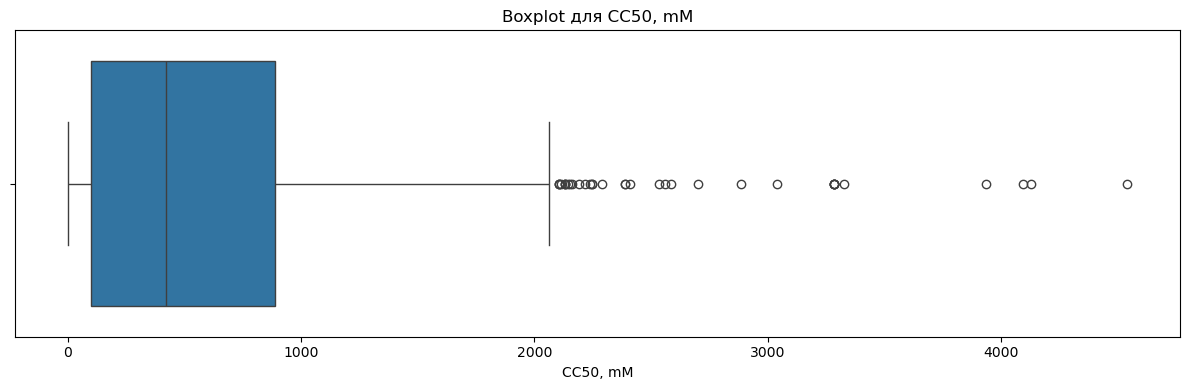

In [55]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [56]:
df["log_10_IC50, mM"] = np.log10(df[target])

In [57]:
target_old = target
target = "log_10_IC50, mM"

In [58]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,"log_10_IC50, mM"
494,0.646747,-0.704660,-2.276510,-1.092152,-1.374389,-0.050563,1.543243,1.024606,0.670735,0.593205,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.275104,0.810833,2.947368,-0.091069
650,0.713953,-0.766662,0.480211,-0.564401,-1.050408,0.351183,0.156981,0.628572,-0.873178,0.596027,...,-0.032191,-0.032191,-0.238522,3.63399,-0.169643,-0.085436,0.471609,1.664502,3.529412,0.221284
735,-1.390456,0.713640,0.802752,-0.076737,2.451767,-1.573665,-1.733732,1.106576,-1.339904,-0.583817,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,60.996734,0.700808,0.011489,-0.154401
736,-1.390456,0.713640,0.802752,-0.076737,2.451767,-1.573665,-1.733732,1.106576,-1.339904,-0.583817,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,11.001362,0.700808,0.063702,-0.154401
762,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,0.108830,0.800223,7.352941,-0.096789
763,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,2.999235,0.800223,0.266809,-0.096789
764,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,29.000074,0.800223,0.027594,-0.096789
765,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,1.501218,0.800223,0.533049,-0.096789
766,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,16.001255,0.700995,0.043809,-0.154285
767,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,21.001047,0.700995,0.033379,-0.154285


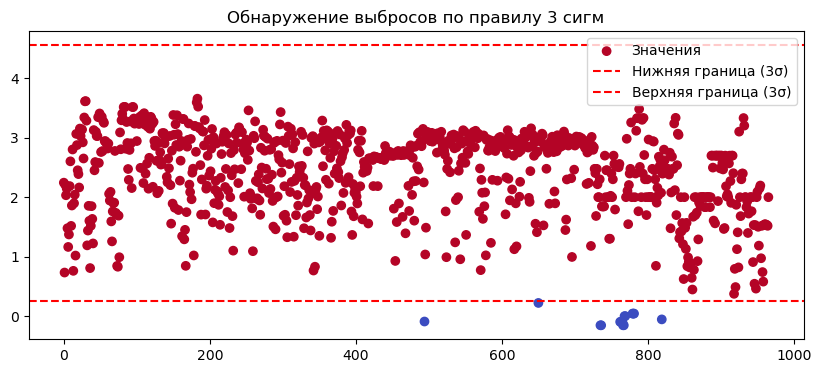

In [59]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [60]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,"log_10_IC50, mM",is_outlier_3σ,is_outlier_IQR
494,0.646747,-0.704660,-2.276510,-1.092152,-1.374389,-0.050563,1.543243,1.024606,0.670735,0.593205,...,-0.238522,-0.27518,-0.169643,-0.085436,0.275104,0.810833,2.947368,-0.091069,True,True
650,0.713953,-0.766662,0.480211,-0.564401,-1.050408,0.351183,0.156981,0.628572,-0.873178,0.596027,...,-0.238522,3.63399,-0.169643,-0.085436,0.471609,1.664502,3.529412,0.221284,True,True
735,-1.390456,0.713640,0.802752,-0.076737,2.451767,-1.573665,-1.733732,1.106576,-1.339904,-0.583817,...,-0.238522,-0.27518,-0.169643,-0.085436,60.996734,0.700808,0.011489,-0.154401,True,True
736,-1.390456,0.713640,0.802752,-0.076737,2.451767,-1.573665,-1.733732,1.106576,-1.339904,-0.583817,...,-0.238522,-0.27518,-0.169643,-0.085436,11.001362,0.700808,0.063702,-0.154401,True,True
762,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.238522,-0.27518,-0.169643,-0.085436,0.108830,0.800223,7.352941,-0.096789,True,True
763,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.238522,-0.27518,-0.169643,-0.085436,2.999235,0.800223,0.266809,-0.096789,True,True
764,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.238522,-0.27518,-0.169643,-0.085436,29.000074,0.800223,0.027594,-0.096789,True,True
765,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.238522,-0.27518,-0.169643,-0.085436,1.501218,0.800223,0.533049,-0.096789,True,True
766,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.238522,-0.27518,-0.169643,-0.085436,16.001255,0.700995,0.043809,-0.154285,True,True
767,0.323229,-0.700587,0.343971,0.529446,-0.366018,-0.308884,0.749582,-0.711856,0.915935,-0.465143,...,-0.238522,-0.27518,-0.169643,-0.085436,21.001047,0.700995,0.033379,-0.154285,True,True


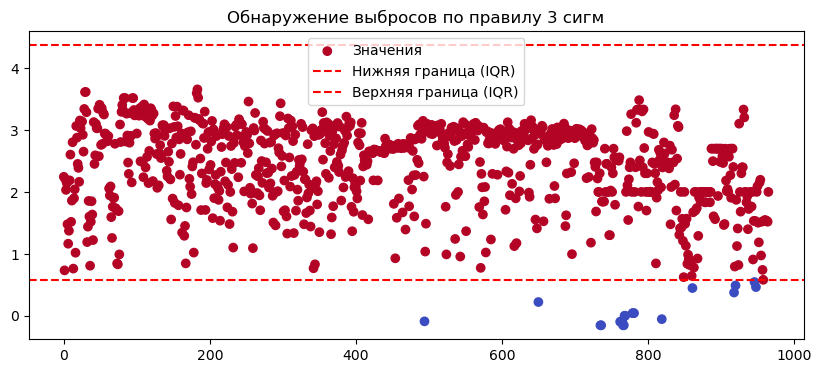

In [61]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Как видно, распределение близко к нормальному, поэтому отбросим выбросы по правлу 3-х сигм

In [62]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,"log_10_IC50, mM",is_outlier_3σ,is_outlier_IQR
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.238522,-0.27518,2.264143,-0.085436,6.239374,175.482382,28.125000,2.244234,False,False
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.238522,-0.27518,2.264143,-0.085436,0.771831,5.402819,7.000000,0.732620,False,False
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.238522,-0.27518,2.264143,-0.085436,223.808778,161.142320,0.720000,2.207210,False,False
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.238522,-0.27518,3.075405,-0.085436,1.705624,107.855654,63.235294,2.032843,False,False
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,139.270991,1.300000,2.143861,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,34.999650,1.129017,1.544064,False,False
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,33.999415,1.062484,1.531471,False,False
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,33.999458,1.096761,1.531472,False,False
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,32.999644,1.031272,1.518509,False,False


In [63]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM",SI,"log_10_IC50, mM"
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,6.239374,28.125000,2.244234
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,0.771831,7.000000,0.732620
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436,223.808778,0.720000,2.207210
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436,1.705624,63.235294,2.032843
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,107.131532,1.300000,2.143861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.000104,1.129017,1.544064
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.999934,1.062484,1.531471
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,30.999883,1.096761,1.531472
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436,31.998959,1.031272,1.518509


In [64]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [65]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.763647,1.227715,0.858123,-0.755891,1.073323,0.258081,-1.556297,1.522921,-2.064995,-0.581532,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
1,-2.108224,2.095440,0.951585,-0.544168,1.254983,0.289724,-1.759553,1.260180,-2.212699,-0.571135,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
2,-2.514136,2.150839,0.957552,-1.490120,1.014426,0.745889,-1.118121,1.099403,-2.397328,-0.545366,...,6.369345,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,2.264143,-0.085436
3,-1.762654,1.247702,0.860276,-0.941357,0.988562,0.368166,-1.556297,1.522921,-2.156673,-0.581603,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,3.075405,-0.085436
4,-1.746485,0.536885,0.783714,-0.701088,0.563542,0.902106,-1.367945,2.002451,-2.242239,-0.580930,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.621634,-0.779389,0.307862,-0.918328,1.566453,0.492661,0.628761,-0.790557,-0.036530,-0.461498,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
962,0.834722,-0.884119,0.165598,-0.980878,1.201620,1.050498,0.704502,-0.776102,-0.233468,-0.461496,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
963,0.943127,-0.906571,0.196551,-1.377478,0.997433,1.522336,0.707042,-0.775993,0.065049,0.598260,...,-0.179657,3.613328,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436
964,0.893994,-0.196583,-0.286468,-0.923926,0.761096,1.340989,0.586631,-0.792770,-1.593940,-0.464683,...,-0.179657,-0.209755,-0.112154,-0.096976,-0.032191,-0.032191,-0.238522,-0.27518,-0.169643,-0.085436


In [66]:
y_ic50

0      2.244234
1      0.732620
2      2.207210
3      2.032843
4      2.143861
         ...   
961    1.544064
962    1.531471
963    1.531472
964    1.518509
965    1.999998
Name: log_10_IC50, mM, Length: 950, dtype: float64

In [67]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

## Инициализация моделей и метрик

In [68]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [69]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [70]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=RANDOM_STATE),
    'XGBoost': XGBRegressor(random_state=RANDOM_STATE),
    'SVR': SVR()
}

metrics = {
    'R2': r2_score,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MAPE': mean_absolute_percentage_error
}

## Бейзлайн

Проверим линейные модели, деревья, а также SVR

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50, 
                               cv=5, scoring='r2', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    y_pred = model.predict(X_test)
    
    model_metrics = {metric_name: metric_func(y_test_ic50, y_pred) 
                     for metric_name, metric_func in metrics.items()}
    
    results.append({
        'model': name,
        'cv_mean_r2': np.mean(cv_scores),
        'cv_std_r2': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

          model  cv_mean_r2  cv_std_r2        R2      RMSE       MAE      MAPE
0         Ridge   -0.047528   0.651933  0.164107  0.561113  0.424305  0.235227
1         Lasso   -0.005258   0.003626 -0.021249  0.620213  0.508719  0.286448
2  RandomForest    0.471875   0.060530  0.376245  0.484710  0.349922  0.195116
3       XGBoost    0.417705   0.097679  0.306423  0.511119  0.367526  0.199531
4           SVR    0.463652   0.057710  0.338651  0.499103  0.365159  0.204538


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [73]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [74]:
N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

N_TRIALS_SVR = 30
CV_FOLDS_SVR = 5

### Random Forest

In [75]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestRegressor(
        **params,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_RF, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)

In [76]:
study_rf = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF)

[I 2025-06-04 00:28:27,687] A new study created in memory with name: no-name-691fa48a-0e58-4f07-a987-e1aab0cb937e
[I 2025-06-04 00:28:31,469] Trial 0 finished with value: 0.47341297749010397 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.47341297749010397.
[I 2025-06-04 00:28:35,597] Trial 1 finished with value: 0.4600916775650382 and parameters: {'n_estimators': 641, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.47341297749010397.
[I 2025-06-04 00:28:39,155] Trial 2 finished with value: 0.4798807359564491 and parameters: {'n_estimators': 374, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.4798807359564491.
[I 2025-06-04 00:28:44,215] Trial 3 finished with value: 0.45763557

In [77]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший R2: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 624, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
Лучший R2: 0.4945


In [78]:
best_rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_rf_model.fit(X_train, y_train_ic50)

RandomForestRegressor(bootstrap=False, max_depth=19, max_features='log2',
                      min_samples_split=10, n_estimators=624, n_jobs=-1,
                      random_state=42)

#### Оценка модели на лучшем наборе данных

In [79]:
y_pred_best_rf = best_rf_model.predict(X_test)

final_metrics_rf = {metric_name: metric_func(y_test_ic50, y_pred_best_rf) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.4006
RMSE: 0.4752
MAE: 0.3501
MAPE: 0.1944


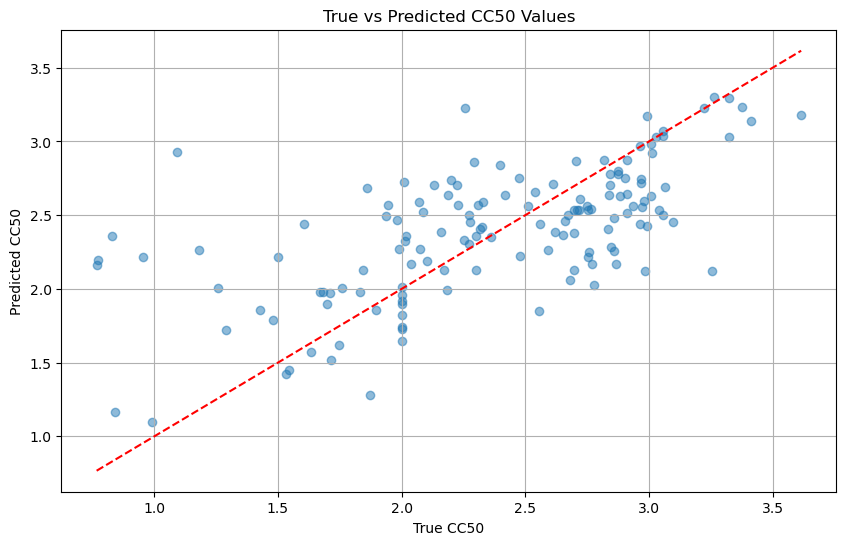

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_rf, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True CC50')
plt.ylabel('Predicted CC50')
plt.title('True vs Predicted CC50 Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

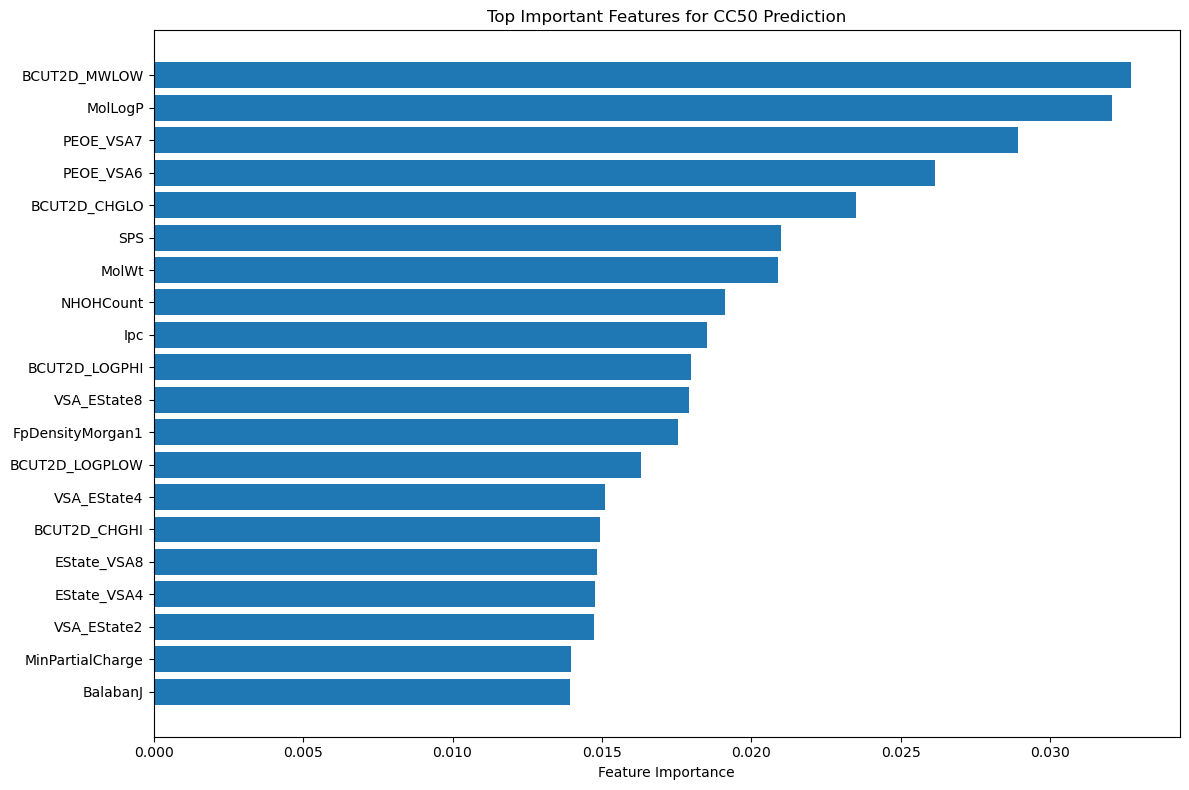

In [81]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for CC50 Prediction')
    plt.tight_layout()
    plt.show()

### XGBoost

In [82]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }
    
    model = XGBRegressor(
        **params,
        random_state=RANDOM_STATE,
        tree_method='exact',
        enable_categorical=False
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_XGB, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [83]:
study_xgb = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_XGB)

[I 2025-06-04 00:38:34,236] A new study created in memory with name: no-name-253cd5e7-888d-4dda-af67-a89dd5472299
[I 2025-06-04 00:39:04,465] Trial 0 finished with value: 0.46024217505712695 and parameters: {'n_estimators': 437, 'max_depth': 12, 'learning_rate': 0.06504856968981275, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 0.7799726016810132, 'reg_alpha': 0.5808361216819946, 'reg_lambda': 8.661761457749352}. Best is trial 0 with value: 0.46024217505712695.
[I 2025-06-04 00:40:01,407] Trial 1 finished with value: 0.2896941620916579 and parameters: {'n_estimators': 641, 'max_depth': 10, 'learning_rate': 0.001124579825911934, 'subsample': 0.9849549260809971, 'colsample_bytree': 0.9162213204002109, 'gamma': 1.0616955533913808, 'reg_alpha': 1.8182496720710062, 'reg_lambda': 1.8340450985343382}. Best is trial 0 with value: 0.46024217505712695.
[I 2025-06-04 00:40:26,385] Trial 2 finished with value: 0.44265048685414277 and parameters: {'n_estimators':

In [84]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший R2: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 809, 'max_depth': 7, 'learning_rate': 0.017070162066903233, 'subsample': 0.5934365003668471, 'colsample_bytree': 0.9269728765836119, 'gamma': 0.5283301681780875, 'reg_alpha': 0.39178861916313856, 'reg_lambda': 0.26423963675142725}
Лучший R2: 0.4878


In [85]:
best_xgb_model = XGBRegressor(
    **study_xgb.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_xgb_model.fit(X_train, y_train_ic50)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9269728765836119, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.5283301681780875, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.017070162066903233,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=809, n_jobs=-1,
             num_parallel_tree=None, ...)

#### Оценка модели на лучшем наборе данных

In [86]:
y_pred_best_xgb = best_xgb_model.predict(X_test)

final_metrics_xgb = {metric_name: metric_func(y_test_ic50, y_pred_best_xgb) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_xgb.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.3315
RMSE: 0.5018
MAE: 0.3691
MAPE: 0.2070


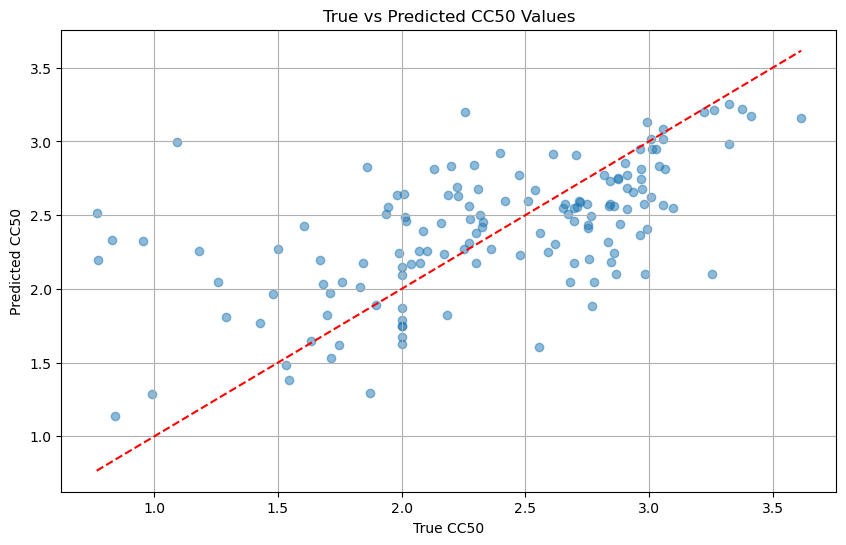

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_xgb, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True CC50')
plt.ylabel('Predicted CC50')
plt.title('True vs Predicted CC50 Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

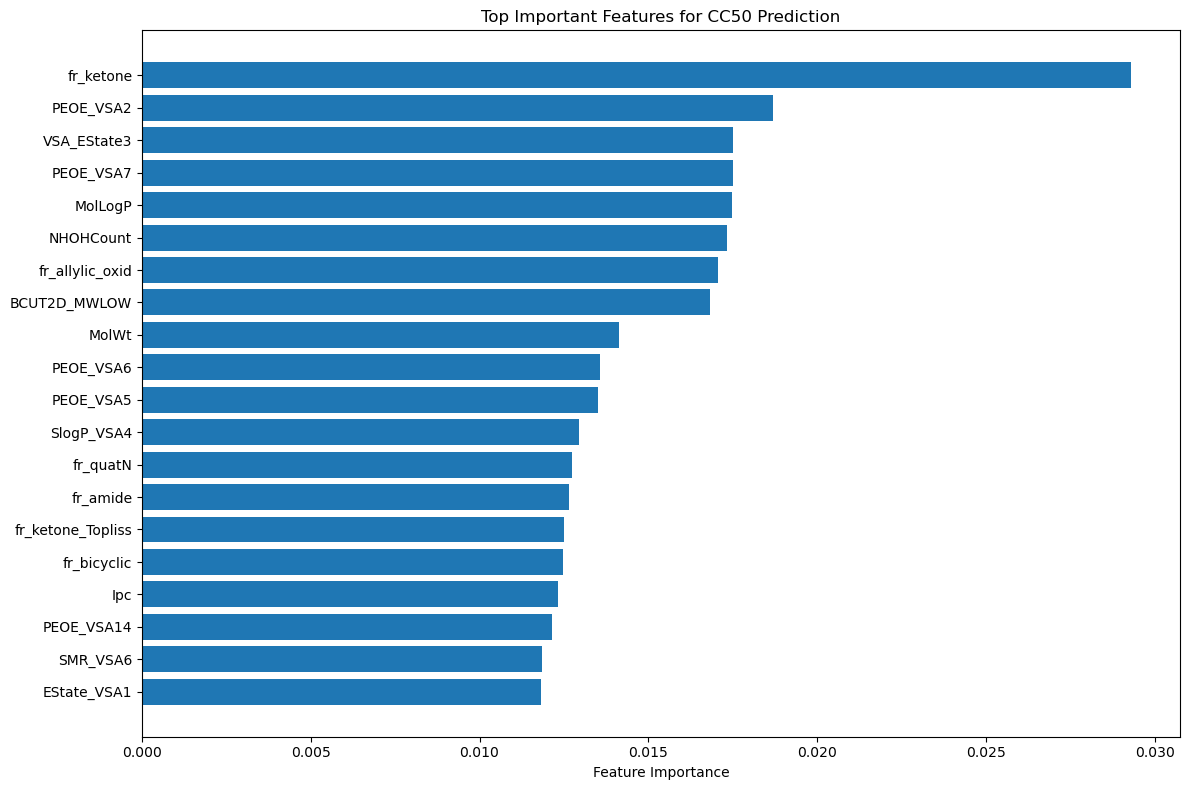

In [88]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for CC50 Prediction')
    plt.tight_layout()
    plt.show()

### SVR

In [89]:
def optimize_svr(trial):
    params = {
        'C': trial.suggest_float('C', 0.1, 100, log=True),
        'epsilon': trial.suggest_float('epsilon', 0.001, 1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'gamma': trial.suggest_float('gamma', 0.001, 10, log=True)
    }
    
    if params['kernel'] == 'poly':
        params['degree'] = trial.suggest_int('degree', 2, 5)
    
    model = SVR(**params)
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_SVR, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [90]:
study_svr = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_svr.optimize(optimize_svr, n_trials=N_TRIALS_SVR)

[I 2025-06-04 01:08:58,094] A new study created in memory with name: no-name-452b78d7-4bfe-4855-8e21-6f49f40bf8aa
[I 2025-06-04 01:08:58,463] Trial 0 finished with value: -0.13129321348441725 and parameters: {'C': 1.3292918943162164, 'epsilon': 0.7114476009343417, 'kernel': 'linear', 'gamma': 0.004207988669606638}. Best is trial 0 with value: -0.13129321348441725.
[I 2025-06-04 01:08:58,806] Trial 1 finished with value: 0.09711340915849984 and parameters: {'C': 0.2937538457632829, 'epsilon': 0.001493656855461764, 'kernel': 'linear', 'gamma': 0.6796578090758157}. Best is trial 1 with value: 0.09711340915849984.
[I 2025-06-04 01:08:58,855] Trial 2 finished with value: 0.1122701969490307 and parameters: {'C': 0.115279871282324, 'epsilon': 0.8123245085588684, 'kernel': 'linear', 'gamma': 0.005337032762603957}. Best is trial 2 with value: 0.1122701969490307.
[I 2025-06-04 01:08:59,164] Trial 3 finished with value: 0.10505138082838412 and parameters: {'C': 0.35498788321965025, 'epsilon': 0.0

In [91]:
print(f"Лучшие параметры для SVR:")
print(study_svr.best_params)
print(f"Лучший R2: {study_svr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_svr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_svr)
fig.show()

Лучшие параметры для SVR:
{'C': 93.06685050616697, 'epsilon': 0.11926869623359654, 'kernel': 'rbf', 'gamma': 0.023506997063237126}
Лучший R2: 0.4110


In [92]:
best_svr_model = SVR(
    **study_svr.best_params
)
best_svr_model.fit(X_train, y_train_ic50)

SVR(C=93.06685050616697, epsilon=0.11926869623359654,
    gamma=0.023506997063237126)

#### Оценка модели на лучшем наборе данных

In [93]:
y_pred_best_svr = best_svr_model.predict(X_test)

final_metrics_svr = {metric_name: metric_func(y_test_ic50, y_pred_best_svr) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_svr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.3711
RMSE: 0.4867
MAE: 0.3597
MAPE: 0.1968


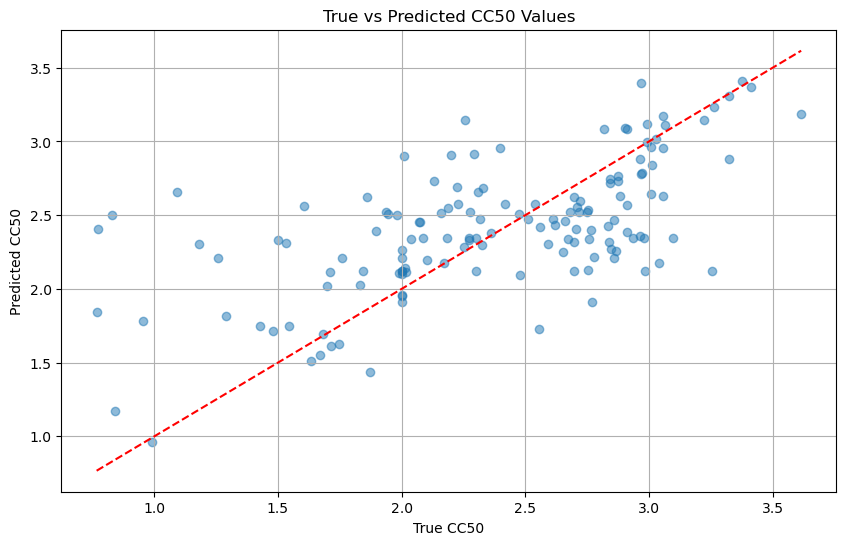

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_svr, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True CC50')
plt.ylabel('Predicted CC50')
plt.title('True vs Predicted CC50 Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

In [95]:
if hasattr(best_svr_model, 'feature_importances_'):
    importances = best_svr_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for CC50 Prediction')
    plt.tight_layout()
    plt.show()

## Сравнение моделей

In [96]:
metrics_comparisson = {
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
    "SVR": final_metrics_svr
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [97]:
df_metrics

,RF,XGB,SVR
R2,0.400580,0.331455,0.371130
RMSE,0.475161,0.501811,0.486694
MAE,0.350083,0.369147,0.359670
MAPE,0.194411,0.207041,0.196842


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

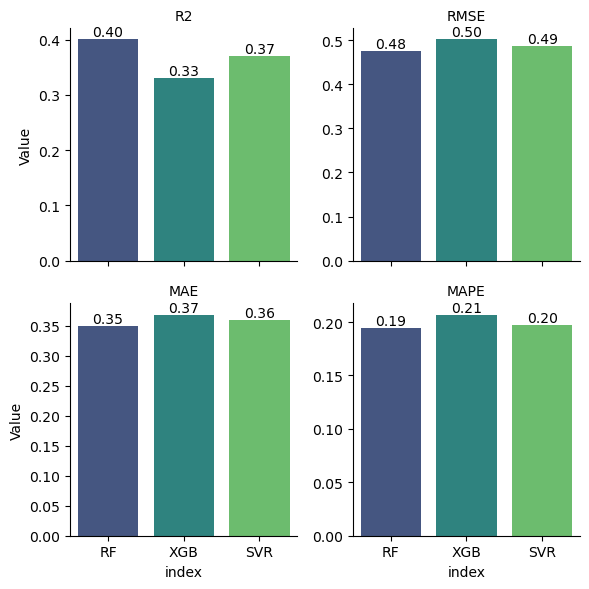

In [98]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Модели в целом идентичны